In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
df = pd.read_csv("user-item-ratings.csv")

In [3]:
df.head()

,Unnamed: 0,gPlusPlaceId,gPlusUserId,rating
0,0,100022007736304191686,100087143022600684733,5
1,1,100022007736304191686,100133395747831313138,4
2,2,100022007736304191686,100209199760685929571,2
3,3,100022007736304191686,100435058171642289087,4
4,4,100022007736304191686,100521433568980018502,5


In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
df.rename(columns = {'gPlusPlaceId':'PlaceID', 'gPlusUserId':'UserID'}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75201 entries, 0 to 75200
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PlaceID  75201 non-null  object
 1   UserID   75201 non-null  object
 2   rating   75201 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
df.describe()

,rating
count,75201.000000
mean,4.131581
std,0.855684
min,0.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df1 = df['rating'].value_counts()
df1 = pd.DataFrame(df1)
df1.reset_index(inplace=True)
df1.rename(columns={'index':'rating','rating':'count'},inplace=True)
df1

,rating,count
0,4,30771
1,5,28943
2,3,12544
3,2,2332
4,1,604
5,0,7


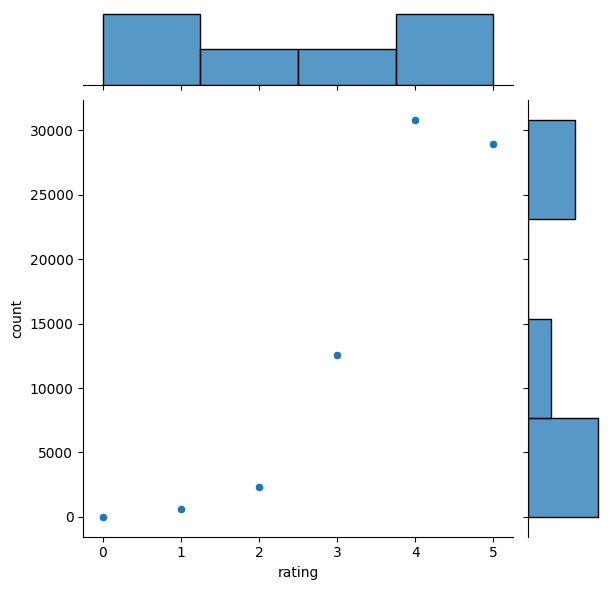

In [9]:
sns.jointplot(x="rating",y='count',data=df1)

In [10]:
mean_place = df.groupby(['PlaceID'])['rating'].mean()

In [11]:
mean_place = pd.DataFrame(mean_place)

In [12]:
mean_place

,rating
PlaceID,
100022007736304191686,4.538462
100025127231597148218,4.202899
100028105475427726851,3.834783
100044132714663889919,4.504762
100050255685057924266,4.202128
...,...
118389607958985415368,4.283951
118401183730584708191,3.571429
118402608184371121535,4.166667


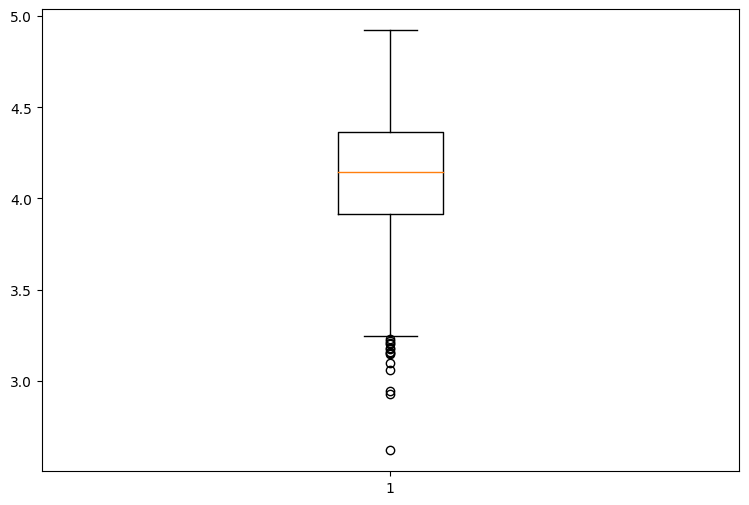

In [13]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(mean_place)

C:\Users\HP\AppData\Local\Temp\ipykernel_15656\749283289.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(mean_place,shade=True)


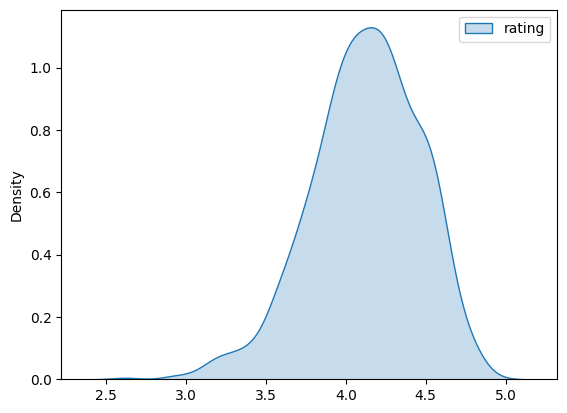

In [14]:
ax = sns.kdeplot(mean_place,shade=True)
plt.show()

In [15]:
print("Unique UserID count: %s" % str(df.UserID.nunique()))
print("Unique ProductID count: %s" % str(df.PlaceID.nunique()))

Unique UserID count: 14775
Unique ProductID count: 949


In [16]:
rating_count = df.groupby('PlaceID')['rating'].count()
rating_count.head()

PlaceID
100022007736304191686     78
100025127231597148218     69
100028105475427726851    115
100044132714663889919    105
100050255685057924266     94
Name: rating, dtype: int64

In [17]:
rating_count = pd.DataFrame(rating_count)

C:\Users\HP\AppData\Local\Temp\ipykernel_15656\4153411579.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(rating_count, shade=True, color='grey')


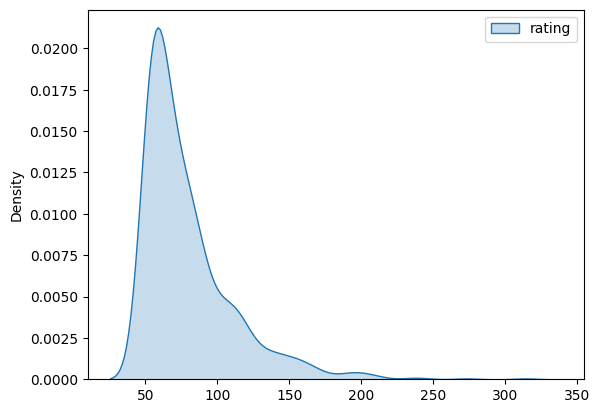

In [18]:
ax = sns.kdeplot(rating_count, shade=True, color='grey')
plt.show()

In [19]:
df_rating=pd.DataFrame({'Number of Rating':df.groupby('PlaceID').count()['rating']})

In [20]:
df_rating

,Number of Rating
PlaceID,
100022007736304191686,78
100025127231597148218,69
100028105475427726851,115
100044132714663889919,105
100050255685057924266,94
...,...
118389607958985415368,162
118401183730584708191,56
118402608184371121535,54


Text(0, 0.5, 'Frequency')

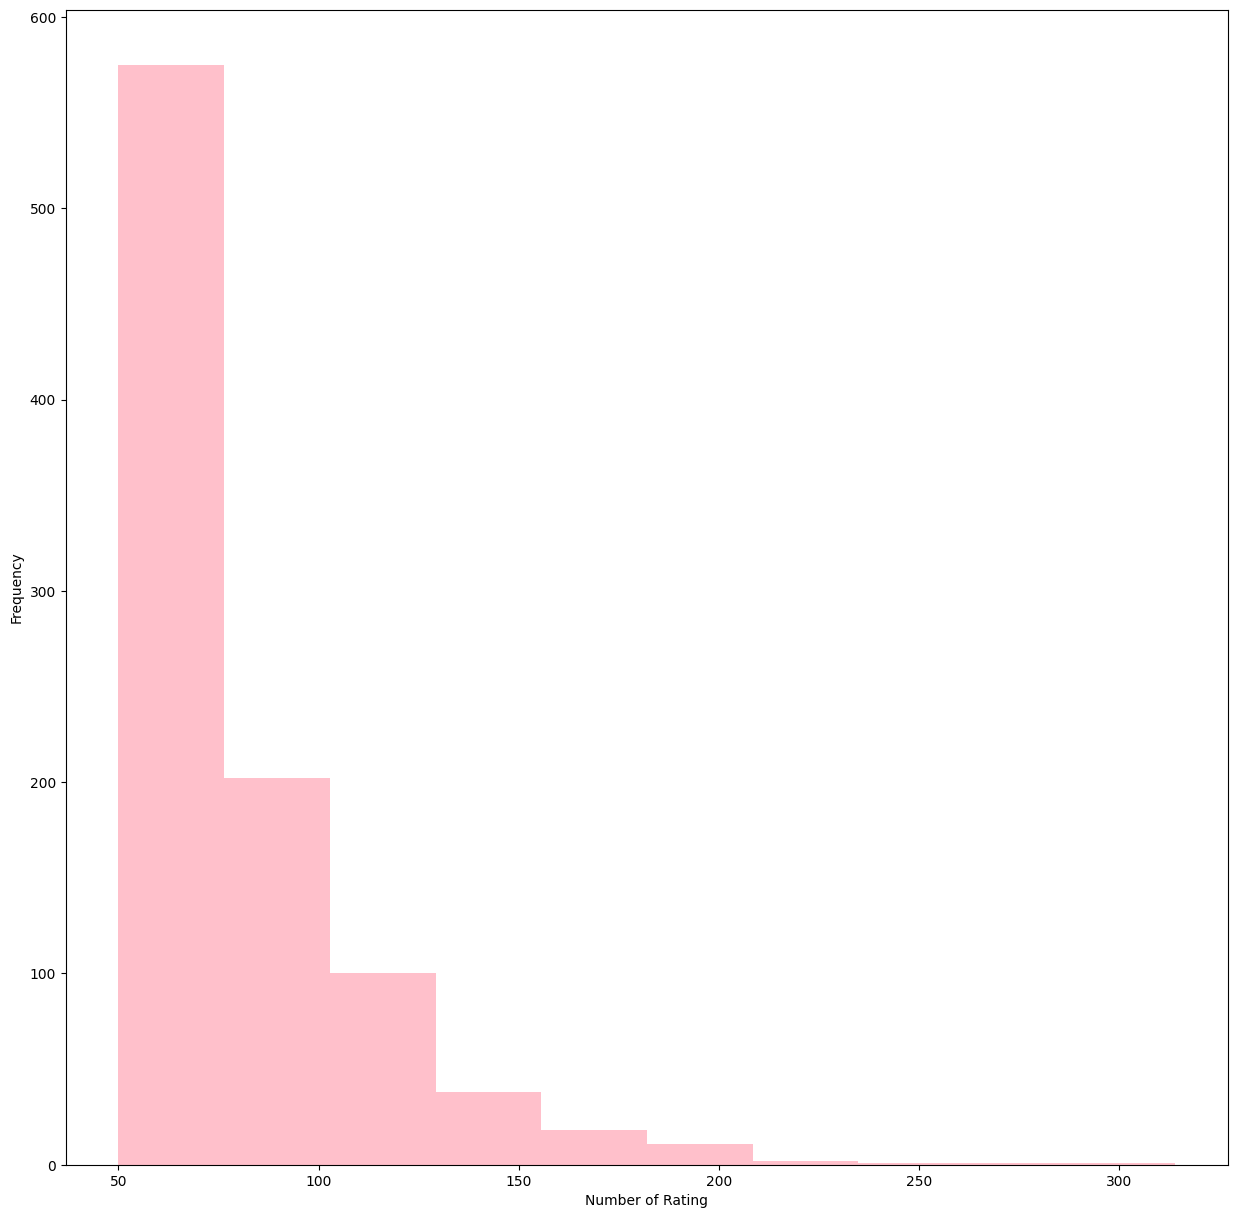

In [21]:
plt.figure(figsize=(15,15))
plt.hist(x='Number of Rating',data=df_rating,color='pink')
plt.xlabel('Number of Rating')
plt.ylabel('Frequency')

In [22]:
most_rated = pd.DataFrame(df.groupby('PlaceID')['rating'].count())

In [23]:
most_rated_places = most_rated.sort_values('rating', ascending=False)
most_rated_places.head(5)

,rating
PlaceID,
106603537575677448372,314
118197036100848201903,273
109555016884084527684,242
105539817238070523193,234
107762553597304912662,213


<AxesSubplot:xlabel='PlaceID'>

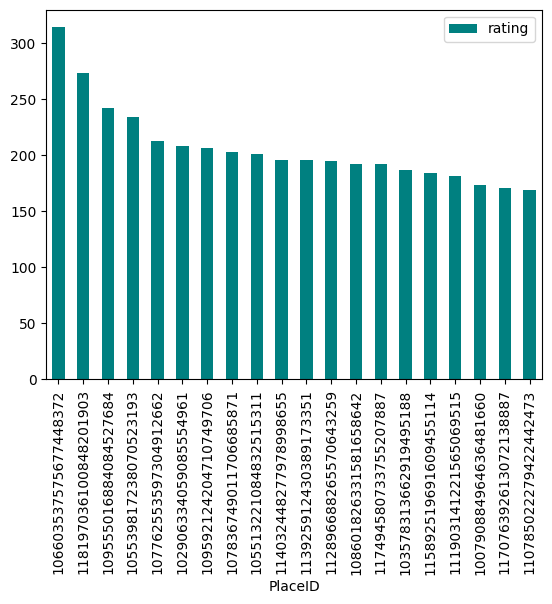

In [24]:
most_rated_places.head(20).plot(kind = "bar", color='teal')

In [25]:
least_rated_places = most_rated.sort_values('rating', ascending=True)

<AxesSubplot:xlabel='PlaceID'>

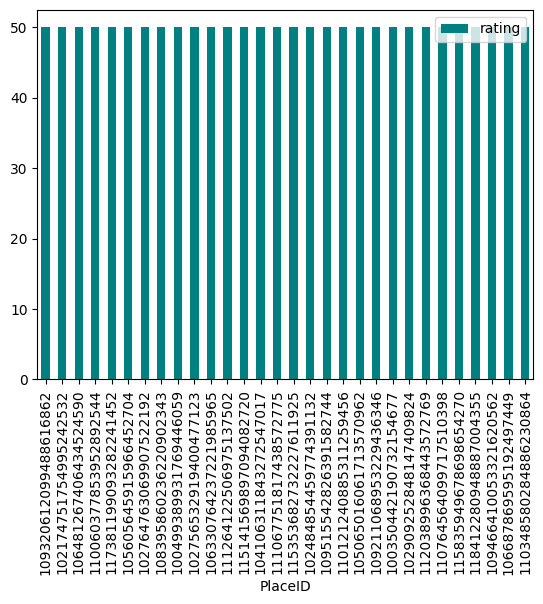

In [26]:
least_rated_places.head(30).plot(kind = "bar", color='teal')